In [1]:
import sys
sys.path.append('../src')

from KBSA import *

In [2]:
def generate_rv(theta, case):
    xi = random.normalvariate(1, 1)
    X = random.normalvariate(theta[0], 1)    
    if case == 1: 
        t1,t2=theta
        Y = (2.6*(t1**2+t2**2)-4.8*t1*t2)*xi+\
            X+X**2/2
    if case == 2:
        Y = (sum([(theta[i]-(i+1))**2 for i in range(len(theta))])+1)*xi+\
            X+X**2/2
    if case == 3:
        Y = xi+sum([(theta[i]-(i+1))*theta[i] for i in range(len(theta))])+\
            X+X**2/2        
    return Y, X

def evaluate(theta, case = 1):
    qxi = norm.ppf(.6, 1, 1)
    v = theta[0]
    if case == 1:
        t1,t2=theta
        f =  (2.6*(t1**2+t2**2)-4.8*t1*t2)*qxi+v+v**2/2
    if case == 2:
        f = (sum([(theta[i]-(i+1))**2 for i in range(len(theta))])+1)*qxi+v+v**2/2
    if case == 3:
        f = qxi+sum([(theta[i]-(i+1))*theta[i] for i in range(len(theta))])+v+v**2/2    
    return f

In [3]:
q = lambda theta, X, v:.5-I(X, v)
m = [lambda theta, Y, l:.6-I(Y, l)]

### compute optimal solutions

In [4]:
qxi = norm.ppf(.6, 1, 1)
t1 = -1/((5.2-4.8*4.8/5.2)*qxi+1)
t2 = 12/13*t1
opt1_theta=np.array([t1,t2])
opt1 = evaluate(opt1_theta, case=1)

t12 = (2*qxi-1)/3
opt2_theta=np.array([t12]+[(i+1) for i in range(1,10)])
opt2 = evaluate(opt2_theta, case=2)

opt3_theta = np.array([0]+[(i+1)/2 for i in range(1,20)])
opt3 = evaluate(opt3_theta, case=3)

In [5]:
def alg_para(case):
    a = lambda i: 1/(i+1e4)
    b = lambda i: 2/(i+1)**(4/5)
    bb = lambda i: 2/(i+1)**(4/5)            
    b1 = [lambda i: 5/(i+1)**(4/5)]
    bb1 = [lambda i: 25/(i+1)**(4/5)]
    h = [lambda i: 1/(i+1)**(1/10),
        lambda i: 1/(i+1)**(1/10)]     
    if case == 1:
        c = lambda i: .5/(i+1)**(1/10)
    if case == 2:
        c = lambda i: 1/(i+1)**(1/10)
    if case == 3:       
        c = lambda i: 8/(i+1)**(1/10)
    return a,b,bb,b1,bb1,c,h

def theta_init(case,d):
    if case == 1:
        theta = np.ones(d)
    if case == 2:
        theta = np.array([i+.5 for i in range(d)])    
    if case == 3:
        theta = np.zeros(d)
    return theta

def feasible_set(case,d):
    if case == 1:
        space = [[-2,2]]*2
    if case == 2:
        space = [[i,i+2] for i in range(d)]
    if case == 3:
        space = [[-20,20]]*d
    return space

### implementation

In [10]:
N = int(1e6)
with np.errstate(invalid='raise'):
    try:
        l_set=[[-np.inf,np.inf]]
        v_set=[[-np.inf,np.inf]]
        
        case,d=1,2
        l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
        theta0 = [theta_init(case,d)]
        Gv_set=[[-np.inf,np.inf]]*d
        Gl_set=[[-np.inf,np.inf]]*d
        theta_set=feasible_set(case,d)
        a,b,bb,b1,bb1,c,h=alg_para(case)
        l1, v1, Gv1, Gl1, theta1, fs1, RT1 = KBSA(N, d, l0,v0,Gv0,Gl0,theta0, 
                                             l_set,v_set,Gv_set,Gl_set,theta_set, 
                                             a,b,bb,b1,bb1,c,h,
                                             q,m,generate_rv,evaluate, case)

        case,d=2,10
        l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
        theta0 = [theta_init(case,d)]
        Gv_set=[[-np.inf,np.inf]]*d
        Gl_set=[[-np.inf,np.inf]]*d
        theta_set=feasible_set(case,d)
        a,b,bb,b1,bb1,c,h=alg_para(case)
        l2, v2, Gv2, Gl2, theta2, fs2, RT2 = KBSA(N, d, l0,v0,Gv0,Gl0,theta0, 
                                             l_set,v_set,Gv_set,Gl_set,theta_set,
                                             a,b,bb,b1,bb1,c,h,
                                             q,m,generate_rv,evaluate, case)

        case,d=3,20
        l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
        theta0 = [theta_init(case,d)]
        Gv_set=[[-np.inf,np.inf]]*d
        Gl_set=[[-np.inf,np.inf]]*d
        theta_set=feasible_set(case,d)
        a,b,bb,b1,bb1,c,h=alg_para(case)
        l3, v3, Gv3, Gl3, theta3, fs3, RT3 = KBSA(N, d, l0,v0,Gv0,Gl0,theta0, 
                                             l_set,v_set,Gv_set,Gl_set,theta_set,
                                             a,b,bb,b1,bb1,c,h,
                                             q,m,generate_rv,evaluate,case)
    except FloatingPointError:
        print('Error: Division by Zero')

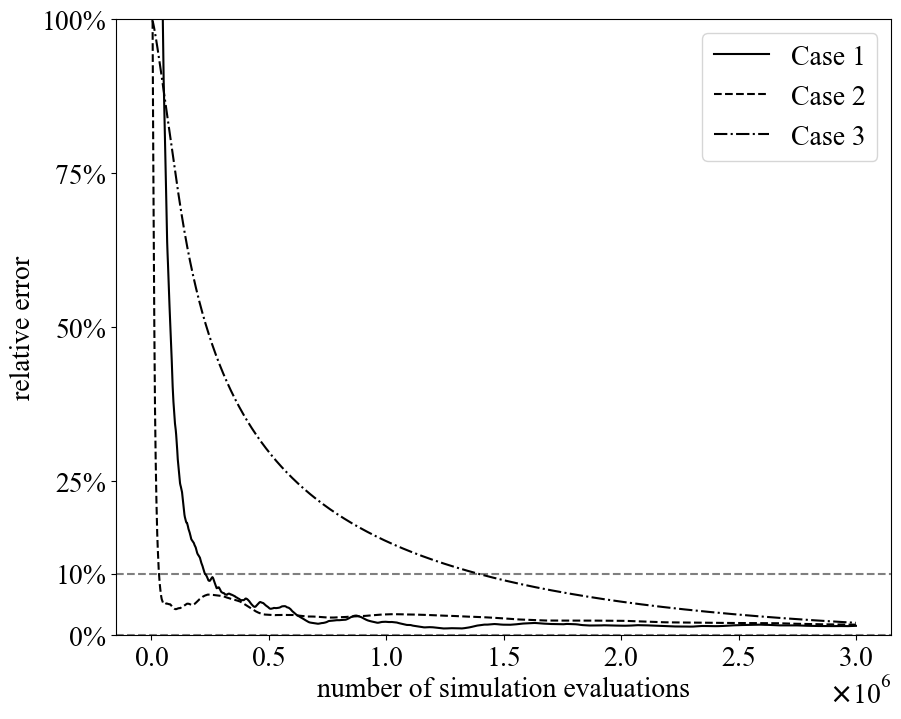

In [12]:
style=itertools.cycle(["-","--","-.",":"])
num_eva=[x*3 for x in range(N)]

error1 = [(fs1[i]-opt1)/abs(opt1) for i in range(1,len(fs1))]
plt.plot(num_eva, error1, label = 'Case 1', color='k', linestyle = next(style))

error2 = [(fs2[i]-opt2)/abs(opt2) for i in range(1,len(fs2))]
plt.plot(num_eva, error2, label = 'Case 2', color='k', linestyle = next(style))

error3 = [(fs3[i]-opt3)/abs(opt3) for i in range(1,len(fs3))]
plt.plot(num_eva, error3, label = 'Case 3', color='k', linestyle = next(style))

plt.axhline(0, color = 'k', alpha = .5, linestyle = '--')
plt.axhline(.1, color = 'k', alpha = .5, linestyle = '--')
plt.ylim(0,1)
plt.legend(fontsize=20)
plt.yticks([0,.1,.25,.5,.75,1])
plt.ylabel('relative error')
plt.xlabel('number of simulation evaluations')

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0,0),useMathText=True)
# plt.show()
# plt.savefig('../results/converge_test_risk.pdf')

## replications

### Case 1

In [15]:
l_set=[[-np.inf,np.inf]]
v_set=[[-np.inf,np.inf]]

case,d=1,2
l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
theta0 = [theta_init(case,d)]
Gv_set=[[-np.inf,np.inf]]*d
Gl_set=[[-np.inf,np.inf]]*d
theta_set=feasible_set(case,d)
a,b,bb,b1,bb1,c,h=alg_para(case)

l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3, \
l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4, \
l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, \
l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst1= replication(d, l0,v0,Gv0,Gl0,theta0,
                                                               l_set,v_set,Gv_set,Gl_set,theta_set,
                                                               a,b,bb,b1,bb1,c,h,
                                                               q,m,generate_rv,evaluate, case)

Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero


D:\research\contextual optimization\code\scripts\../src\KBSA.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  Gv_ = Gv[-1]+bb(i)*H/(2*c_)*delta


Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero


D:\research\contextual optimization\code\scripts\../src\KBSA.py:79: RuntimeWarning: divide by zero encountered in scalar divide
  Gl_ = Gl[p][-1]+bb1[p](i)*Kp*Kn*H/(2*c_)*delta


Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero
Error: Division by Zero


In [16]:
# with open('../results/risk1.pkl', 'wb') as file: 
#     joblib.dump([l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3,
#                  l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4,
#                  l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, 
#                  l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst1], file) 

### Case 2

In [17]:
l_set=[[-np.inf,np.inf]]
v_set=[[-np.inf,np.inf]]

case,d=2,10
l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
theta0 = [theta_init(case,d)]
Gv_set=[[-np.inf,np.inf]]*d
Gl_set=[[-np.inf,np.inf]]*d
theta_set=feasible_set(case,d)
a,b,bb,b1,bb1,c,h=alg_para(case)

l2_lst3, Gl2_lst3, theta2_lst3, fs2_lst3, \
l2_lst4, Gl2_lst4, theta2_lst4, fs2_lst4, \
l2_lst5, Gl2_lst5, theta2_lst5, fs2_lst5, \
l2_lst6, Gl2_lst6, theta2_lst6, fs2_lst6, RT_lst2= replication(d, l0,v0,Gv0,Gl0,theta0,
                                                               l_set,v_set,Gv_set,Gl_set,theta_set,
                                                               a,b,bb,b1,bb1,c,h,
                                                               q,m,generate_rv,evaluate, case)

In [25]:
# with open('../results/risk2.pkl', 'wb') as file: 
#     joblib.dump([l2_lst3, Gl2_lst3, theta2_lst3, fs2_lst3,
#                  l2_lst4, Gl2_lst4, theta2_lst4, fs2_lst4,
#                  l2_lst5, Gl2_lst5, theta2_lst5, fs2_lst5, 
#                  l2_lst6, Gl2_lst6, theta2_lst6, fs2_lst6, RT_lst2], file) 

### Case 3

In [19]:
l_set=[[-np.inf,np.inf]]
v_set=[[-np.inf,np.inf]]

case,d=3,20
l0,v0,Gv0,Gl0 = [[np.zeros(1)]],[np.zeros(1)],[np.zeros(d)],[[np.zeros(d)]]
theta0 = [theta_init(case,d)]
Gv_set=[[-np.inf,np.inf]]*d
Gl_set=[[-np.inf,np.inf]]*d
theta_set=feasible_set(case,d)
a,b,bb,b1,bb1,c,h=alg_para(case)

l3_lst3, Gl3_lst3, theta3_lst3, fs3_lst3, \
l3_lst4, Gl3_lst4, theta3_lst4, fs3_lst4, \
l3_lst5, Gl3_lst5, theta3_lst5, fs3_lst5, \
l3_lst6, Gl3_lst6, theta3_lst6, fs3_lst6, RT_lst3 = replication(d, l0,v0,Gv0,Gl0,theta0,
                                                               l_set,v_set,Gv_set,Gl_set,theta_set,
                                                               a,b,bb,b1,bb1,c,h,
                                                               q,m,generate_rv,evaluate, case)

In [20]:
# with open('../results/risk3.pkl', 'wb') as file: 
#     joblib.dump([l3_lst3, Gl3_lst3, theta3_lst3, fs3_lst3,
#                  l3_lst4, Gl3_lst4, theta3_lst4, fs3_lst4,
#                  l3_lst5, Gl3_lst5, theta3_lst5, fs3_lst5, 
#                  l3_lst6, Gl3_lst6, theta3_lst6, fs3_lst6, RT_lst3], file) 

### descriptive statistics

In [6]:
with open('../results/risk1.pkl', 'rb') as file: 
    l1_lst3, Gl1_lst3, theta1_lst3, fs1_lst3, \
    l1_lst4, Gl1_lst4, theta1_lst4, fs1_lst4, \
    l1_lst5, Gl1_lst5, theta1_lst5, fs1_lst5, \
    l1_lst6, Gl1_lst6, theta1_lst6, fs1_lst6, RT_lst1=joblib.load(file) 

In [7]:
with open('../results/risk2.pkl', 'rb') as file: 
    l2_lst3, Gl2_lst3, theta2_lst3, fs2_lst3, \
    l2_lst4, Gl2_lst4, theta2_lst4, fs2_lst4, \
    l2_lst5, Gl2_lst5, theta2_lst5, fs2_lst5, \
    l2_lst6, Gl2_lst6, theta2_lst6, fs2_lst6, RT_lst2=joblib.load(file) 

In [8]:
with open('../results/risk3.pkl', 'rb') as file: 
    l3_lst3, Gl3_lst3, theta3_lst3, fs3_lst3, \
    l3_lst4, Gl3_lst4, theta3_lst4, fs3_lst4, \
    l3_lst5, Gl3_lst5, theta3_lst5, fs3_lst5, \
    l3_lst6, Gl3_lst6, theta3_lst6, fs3_lst6, RT_lst3=joblib.load(file) 

In [26]:
rlt_error_lst_f1 = [np.mean([(i-opt1)/abs(opt1) for i in fs1_lst3]),np.mean([(i-opt1)/abs(opt1) for i in fs1_lst4]),
                   np.mean([(i-opt1)/abs(opt1) for i in fs1_lst5]),np.mean([(i-opt1)/abs(opt1) for i in fs1_lst6])]

rmse_lst_theta1 = [np.mean([np.linalg.norm(i-opt1_theta)**2 for i in theta1_lst3])**.5,
                   np.mean([np.linalg.norm(i-opt1_theta)**2 for i in theta1_lst4])**.5,
                   np.mean([np.linalg.norm(i-opt1_theta)**2 for i in theta1_lst5])**.5,
                   np.mean([np.linalg.norm(i-opt1_theta)**2 for i in theta1_lst6])**.5]

mean_lst_RT1 = np.mean(RT_lst1,axis=0)

rlt_error_lst_f2 = [np.mean([(i-opt2)/abs(opt2) for i in fs2_lst3]),np.mean([(i-opt2)/abs(opt2) for i in fs2_lst4]),
                   np.mean([(i-opt2)/abs(opt2) for i in fs2_lst5]),np.mean([(i-opt2)/abs(opt2) for i in fs2_lst6])]

rmse_lst_theta2 = [np.mean([np.linalg.norm(i-opt2_theta)**2 for i in theta2_lst3])**.5,
                   np.mean([np.linalg.norm(i-opt2_theta)**2 for i in theta2_lst4])**.5,
                   np.mean([np.linalg.norm(i-opt2_theta)**2 for i in theta2_lst5])**.5,
                   np.mean([np.linalg.norm(i-opt2_theta)**2 for i in theta2_lst6])**.5]

mean_lst_RT2 = np.mean(RT_lst2,axis=0)

rlt_error_lst_f3 = [np.mean([(i-opt3)/abs(opt3) for i in fs3_lst3]),np.mean([(i-opt3)/abs(opt3) for i in fs3_lst4]),
                   np.mean([(i-opt3)/abs(opt3) for i in fs3_lst5]),np.mean([(i-opt3)/abs(opt3) for i in fs3_lst6])]

rmse_lst_theta3 = [np.mean([np.linalg.norm(i-opt3_theta)**2 for i in theta3_lst3])**.5,
                   np.mean([np.linalg.norm(i-opt3_theta)**2 for i in theta3_lst4])**.5,
                   np.mean([np.linalg.norm(i-opt3_theta)**2 for i in theta3_lst5])**.5,
                   np.mean([np.linalg.norm(i-opt3_theta)**2 for i in theta3_lst6])**.5]

mean_lst_RT3 = np.mean(RT_lst3,axis=0)

In [27]:
print('Case 1')
print('error(%) of lambda:',[round(i,4)*100 for i in rlt_error_lst_f1])
print('rmse of theta:',[round(i,2) for i in rmse_lst_theta1])
print('RT:',[round(i,2) for i in np.mean(RT_lst1,axis=0)])
print('-'*40)

print('Case 2')
print('error(%) of lambda:',[round(i,4)*100 for i in rlt_error_lst_f2])
print('rmse of theta:',[round(i,2) for i in rmse_lst_theta2])
print('RT:',[round(i,2) for i in np.mean(RT_lst2,axis=0)])
print('-'*40)

print('Case 3')
print('error(%) of lambda:',[round(i,4)*100 for i in rlt_error_lst_f3])
print('rmse of theta:',[round(i,2) for i in rmse_lst_theta3])
print('RT:',[round(i,2) for i in np.mean(RT_lst3,axis=0)])

Case 1
error(%) of lambda: [724.74, 199.84, 7.6, 1.38]
rmse of theta: [1.93, 1.01, 0.15, 0.03]
RT: [0.45, 4.33, 43.33, 436.29]
----------------------------------------
Case 2
error(%) of lambda: [114.31, 17.18, 4.130000000000001, 1.73]
rmse of theta: [1.42, 0.57, 0.31, 0.24]
RT: [0.49, 4.89, 48.25, 489.47]
----------------------------------------
Case 3
error(%) of lambda: [100.03, 94.11, 42.24, 1.91]
rmse of theta: [26.76, 25.96, 17.39, 3.69]
RT: [0.52, 5.28, 53.6, 537.91]


-0.6183088988280572
-0.2595448478765456
-0.2754189511817575


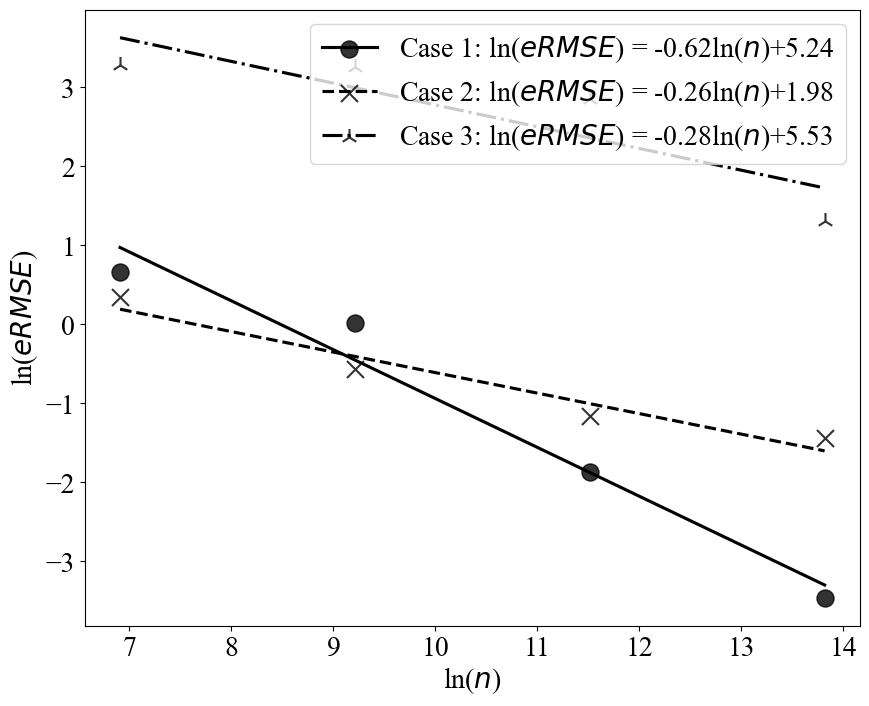

In [30]:
logn=[math.log(1e3),math.log(1e4),math.log(1e5),math.log(1e6)]
style=itertools.cycle(["-","--","-.",":"])

fig, ax = plt.subplots()
logerror=[math.log(rmse) for rmse in rmse_lst_theta1]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
print(slope)
sns.regplot(x=logn, y=logerror, ci = None,ax=ax,
            line_kws={'linestyle': next(style), 'label': r'Case 1: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},
            color='k', marker='o',scatter_kws={'s':150},
            label= r'Case 1: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))
           )

logerror=[math.log(rmse) for rmse in rmse_lst_theta2]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
print(slope)
sns.regplot(x=logn, y=logerror, ci = None,ax=ax,
            line_kws={'linestyle': next(style),'label' : r'Case 2: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},
            color='k',marker='x', scatter_kws={'s':150},
            label= r'Case 2: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))
            )

logerror=[math.log(rmse) for rmse in rmse_lst_theta3]
slope, intercept, r, p, sterr = scipy.stats.linregress(x=logn, y=logerror)
print(slope)
sns.regplot(x=logn, y=logerror, ci = None,ax=ax,
            line_kws={'linestyle': next(style),'label': r'Case 3: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))},
            color='k',marker='2', scatter_kws={'s':150},
            label= r'Case 3: '+'ln($eRMSE$) = '+str(round(slope,2))+'ln($n$)'+'+'+str(round(intercept,2))
            )

handles, labels = ax.get_legend_handles_labels()
ax.legend(loc='upper right',
           handles=[(h1, h2) for h1, h2 in zip([handles[i] for i in [0,2,4]], [handles[i] for i in [1,3,5]])],
           labels=[labels[i] for i in [0,2,4]])
plt.ylabel('ln($eRMSE$)')
plt.xlabel('ln($n$)')
# plt.savefig('../results/rate_test_r.pdf')
plt.show() 